#Predicting Cyberbullying: Data Analysis and Modeling

##Loading Dataset and Analyzing structure

Load essential libraries for data manipulation (pandas) and numerical operations (numpy)

In [79]:
import pandas as pd
import numpy as np

Load the dataset and preview a random sample of rows for an initial inspection

In [80]:
data=pd.read_csv('/content/drive/MyDrive/InfosysSpringboard/Cyberbullying-Prediction/toxic_comments.csv')
data.sample(5)

id                                       comment_text  \
128872  b12ebab8a0ed36c9  There are reports of this phenomenon but the p...   
80147   d673c5f95847f7e6  Regarding image caption on Speed Six photo \n\...   
10238   1b185db86ac2496e  I'm aware of the circumstances.  I don't think...   
114717  65858d128ac1ba98  "I added the scrollbar for the references (the...   
30877   5205ae936582e893  "\nIs V blind?\nThe film makes several suggest...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
128872      0             0        0       0       0              0  
80147       0             0        0       0       0              0  
10238       0             0        0       0       0              0  
114717      0             0        0       0       0              0  
30877       0             0        0       0       0              0

###Analyze the dataset's structure (shape, column types, missing values) and summarize numerical features.

In [81]:
data.shape

(159571, 8)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [83]:
data.describe()

toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       0.009996       0.052948       0.002996   
std         0.294379       0.099477       0.223931       0.054650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

##Data Cleaning

Ensure no duplicates exist in unique identifiers (id) or comment texts.

In [84]:
unique_ids = data['id'].nunique()
unique_comments = data['comment_text'].nunique()
total_rows = len(data)

print(f"Total number of rows: {total_rows}")
print(f"Number of unique 'id' instances: {unique_ids}")
print(f"Number of unique 'comment_text' instances: {unique_comments}")

Total number of rows: 159571
Number of unique 'id' instances: 159571
Number of unique 'comment_text' instances: 159571


Remove the id column, which is not relevant to the prediction task.

In [85]:
data = data.drop('id', axis=1)
data.head()

comment_text  toxic  severe_toxic  \
0  Explanation\nWhy the edits made under my usern...      0             0   
1  D'aww! He matches this background colour I'm s...      0             0   
2  Hey man, I'm really not trying to edit war. It...      0             0   
3  "\nMore\nI can't make any real suggestions on ...      0             0   
4  You, sir, are my hero. Any chance you remember...      0             0   

   obscene  threat  insult  identity_hate  
0        0       0       0              0  
1        0       0       0              0  
2        0       0       0              0  
3        0       0       0              0  
4        0       0       0              0

Create a consolidated binary Bullying label to distinguish between bullying and non-bullying comments.


In [86]:
data['Bullying'] = np.where(
    (data['toxic'] == 1) |
    (data['severe_toxic'] == 1) |
    (data['obscene'] == 1) |
    (data['threat'] == 1) |
    (data['insult'] == 1) |
    (data['identity_hate'] == 1),
    1,
    0
)
data.sample()

comment_text  toxic  severe_toxic  \
4526  "\nApparently the ""consensus"" will never cha...      0             0   

      obscene  threat  insult  identity_hate  Bullying  
4526        0       0       0              0         0

##Text Preprocessing

In [87]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [88]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

####Cleaning Text
Clean comment text by removing punctuation, links, and unwanted characters, making it uniform for modeling.

In [89]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [90]:
data['cleaned_comment'] = data['comment_text'].apply(clean_text)
data.head()

comment_text  toxic  severe_toxic  \
0  Explanation\nWhy the edits made under my usern...      0             0   
1  D'aww! He matches this background colour I'm s...      0             0   
2  Hey man, I'm really not trying to edit war. It...      0             0   
3  "\nMore\nI can't make any real suggestions on ...      0             0   
4  You, sir, are my hero. Any chance you remember...      0             0   

   obscene  threat  insult  identity_hate  Bullying  \
0        0       0       0              0         0   
1        0       0       0              0         0   
2        0       0       0              0         0   
3        0       0       0              0         0   
4        0       0       0              0         0   

                                     cleaned_comment  
0  explanation why the edits made under my userna...  
1  daww he matches this background colour im seem...  
2  hey man im really not trying to edit war its j...  
3   more i cant make any real suggestions on impr...  
4  you sir are my hero any chance you remember wh...

####Tokenizing and Lemmatizing Text
Break text into tokens (words) and reduce words to their base forms for consistency.

In [91]:
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)
data['lemmatized_comment'] = data['cleaned_comment'].apply(tokenize_and_lemmatize)
data.head()

comment_text  toxic  severe_toxic  \
0  Explanation\nWhy the edits made under my usern...      0             0   
1  D'aww! He matches this background colour I'm s...      0             0   
2  Hey man, I'm really not trying to edit war. It...      0             0   
3  "\nMore\nI can't make any real suggestions on ...      0             0   
4  You, sir, are my hero. Any chance you remember...      0             0   

   obscene  threat  insult  identity_hate  Bullying  \
0        0       0       0              0         0   
1        0       0       0              0         0   
2        0       0       0              0         0   
3        0       0       0              0         0   
4        0       0       0              0         0   

                                     cleaned_comment  \
0  explanation why the edits made under my userna...   
1  daww he matches this background colour im seem...   
2  hey man im really not trying to edit war its j...   
3   more i cant make any real suggestions on impr...   
4  you sir are my hero any chance you remember wh...   

                                  lemmatized_comment  
0  explanation edits made username hardcore metal...  
1  daww match background colour im seemingly stuc...  
2  hey man im really trying edit war guy constant...  
3  cant make real suggestion improvement wondered...  
4                sir hero chance remember page thats

##Exploratory Data Analysis

**Understanding Class Imbalance:**

In [92]:
non_toxic_data = data[(data['Bullying']!=1)]
toxic_data = data[(data['Bullying']==1)]
ntd=len(non_toxic_data)/len(data)*100
print("% of non-toxic data: ", ntd)
print("% of toxic data: ", 100-ntd)

% of non-toxic data:  89.83211235124176
% of toxic data:  10.167887648758239


The dataset exhibits a significant class imbalance, with approximately 89.83% of the data belonging to the non-toxic class and 10.17% belonging to the toxic class. This imbalance may negatively impact the model's ability to accurately classify minority class instances. Therefore, it is crucial to employ techniques like oversampling, undersampling, or class weighting to address this issue and improve the model's performance on the minority class.

**Category-wise Occurrence Analysis**


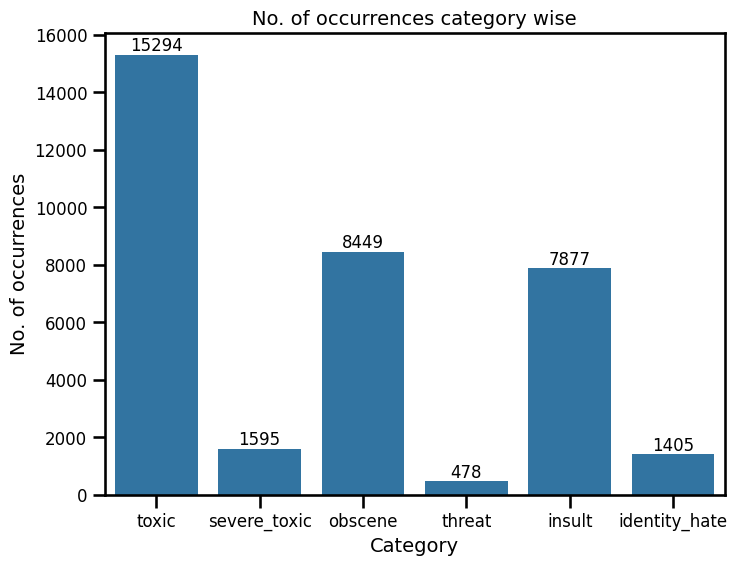

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

x = data.iloc[:, 1:7].sum()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=x.index, y=x.values)

plt.title("No. of occurrences category wise", fontsize=14)
plt.ylabel("No. of occurrences", fontsize=14)
plt.xlabel("Category",  fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for rect in ax.patches:
    ax.annotate(f'{int(rect.get_height())}',
                (rect.get_x() + rect.get_width() / 2, rect.get_height()),
                ha='center', va='bottom',  fontsize=12)

plt.show()

The bar chart illustrates the distribution of different toxicity categories within the dataset. We can observe the following:

* Toxic is the most prevalent category, followed by Obscene and Insult.
* Threat and Identity Hate are the least frequent categories.
* There is a significant imbalance in the distribution of categories.

**Analyze correlations between different toxicity categories to uncover relationships.**

<Axes: >

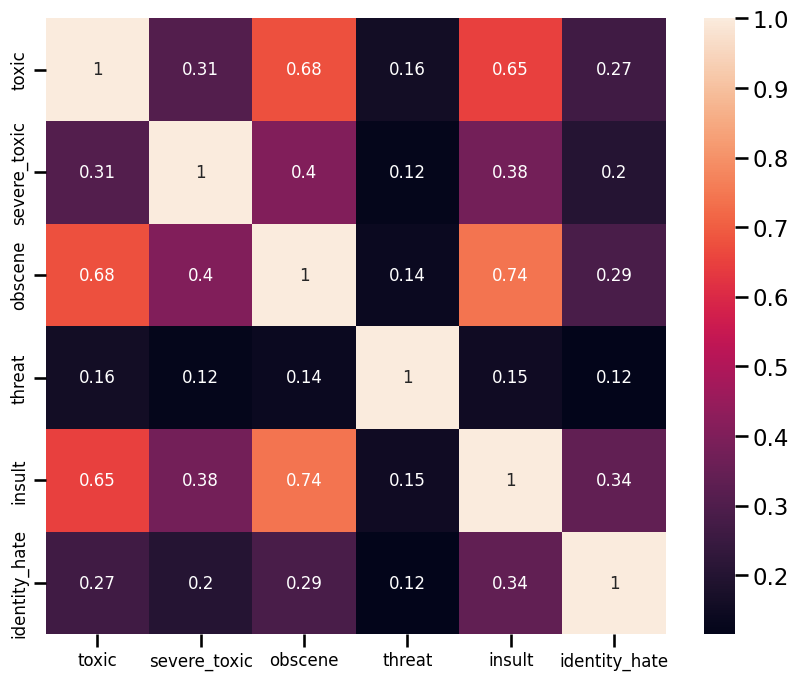

In [94]:
corr=data.iloc[:,1:7].corr()
plt.figure(figsize=(10,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, annot_kws={'size': 12})

The correlation matrix reveals that there is a moderate to strong positive correlation between the different toxicity categories. This suggests that comments classified as toxic are likely to also be classified as obscene, insulting, or containing threats or identity hate.

**Punctuation Analysis**:
Cyberbullies might resort to using internal punctuations to bypass keyword filters or obfuscate their intent. Also, not all internal punctuations indicate malicious intent.

In [115]:
def count_internal_punctuations(text):
    matches = re.findall(r'\b\w+[^\w\s]\w+\b', text)
    return len(matches)

In [116]:
data['internal_punct_count'] = data['comment_text'].apply(count_internal_punctuations)

In [117]:
data.sample()

comment_text  toxic  severe_toxic  \
41971  Opinion sought\nWith reference to [[this discu...      0             0   

       obscene  threat  insult  identity_hate  Bullying  \
41971        0       0       0              0         0   

                                         cleaned_comment  \
41971  opinion sought with reference to this discussi...   

                                      lemmatized_comment  internal_punct_count  
41971  opinion sought reference discussion would like...                     0

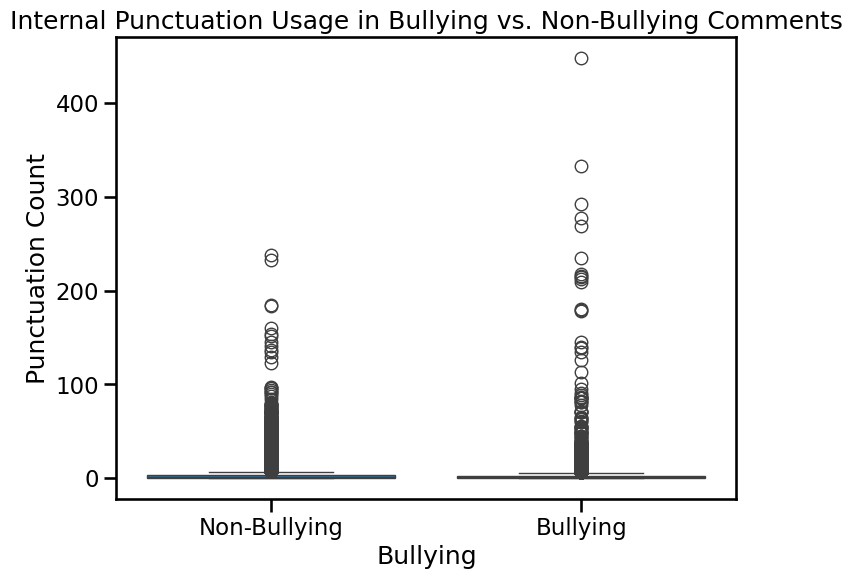

In [118]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Bullying', y='internal_punct_count')
plt.title('Internal Punctuation Usage in Bullying vs. Non-Bullying Comments')
plt.xlabel('Bullying')
plt.ylabel('Punctuation Count')
plt.xticks([0, 1], ['Non-Bullying', 'Bullying'])
plt.show()

The boxplot does suggest a significant number of outliers, particularly in the bullying comments. This indicates that while some bullying comments might use internal punctuation to mask their intent, it's not a universal characteristic.

The boxplot for internal punctuation counts with a limit of 10 shows a clearer picture of the distribution.

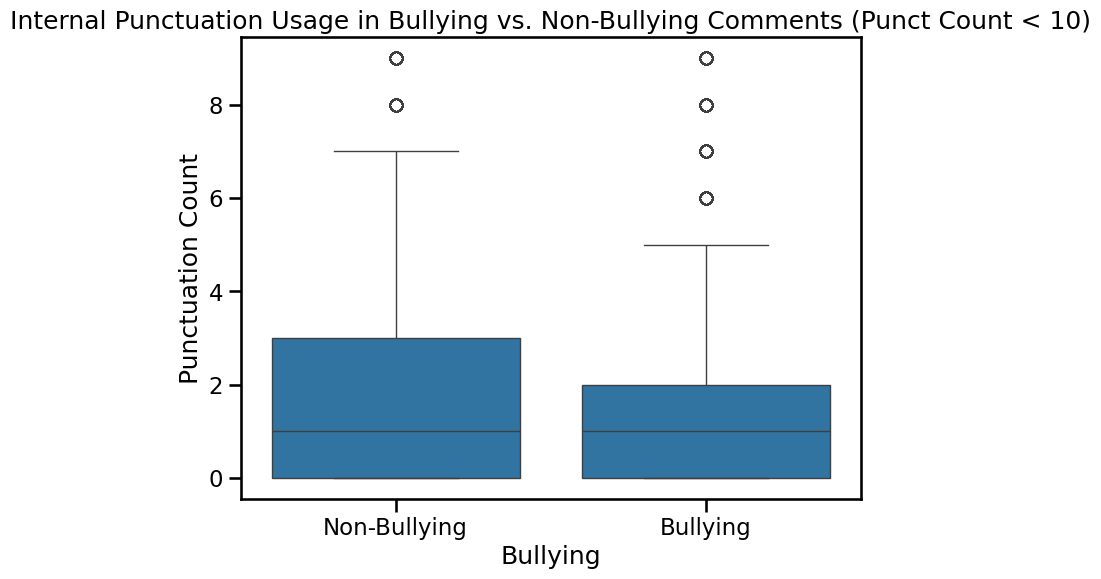

In [119]:
filtered_data = data[data['internal_punct_count'] < 10]

plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data, x='Bullying', y='internal_punct_count')
plt.title('Internal Punctuation Usage in Bullying vs. Non-Bullying Comments (Punct Count < 10)')
plt.xlabel('Bullying')
plt.ylabel('Punctuation Count')
plt.xticks([0, 1], ['Non-Bullying', 'Bullying'])
plt.show()

Both bullying and non-bullying comments have a similar median, indicating that the central tendency of internal punctuation usage is not significantly different between the two classes.

<Figure size 800x600 with 0 Axes>

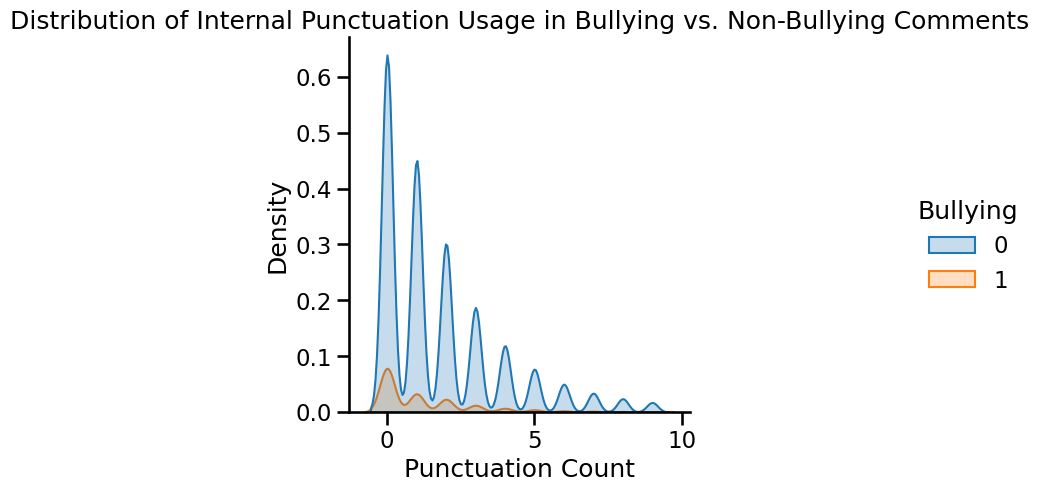

In [121]:
plt.figure(figsize=(8, 6))
sns.displot(data=filtered_data, x='internal_punct_count', hue='Bullying', kind='kde', fill=True)
plt.title('Distribution of Internal Punctuation Usage in Bullying vs. Non-Bullying Comments')
plt.xlabel('Punctuation Count')
plt.ylabel('Density')
plt.show()

This chart visualizes the distribution of internal punctuation usage (e.g., commas, periods, question marks) in comments classified as bullying (1) and non-bullying (0).

Key Insights:
* Non-bullying Comments (Blue):

   * The density peak near 0 suggests that most non-bullying comments have very few or no internal punctuation marks.
   * A gradual decline in density occurs as the punctuation count increases.
* Bullying Comments (Orange):

  * The orange line remains consistently lower than the blue line, indicating that bullying comments tend to have fewer instances of internal punctuation.
  * There is no significant peak, suggesting a more even distribution of punctuation usage across comments.

**Conclusion**: The analysis of internal punctuation usage in bullying and non-bullying comments revealed an interesting pattern. While it was initially hypothesized that cyberbullies might use internal punctuation to mask offensive words, the data suggests otherwise.

Non-bullying comments tend to have a higher frequency of internal punctuation. This could be attributed to longer, more complex sentence structures, or a greater use of formal language.

Bullying comments, on the other hand, often rely on shorter, more direct language. This might be due to the intent to quickly convey a negative message or to provoke a reaction. As a result, they may have fewer internal punctuation marks.

**Word Cloud Generation:**
Generate word clouds to identify frequently used words in different toxicity categories.


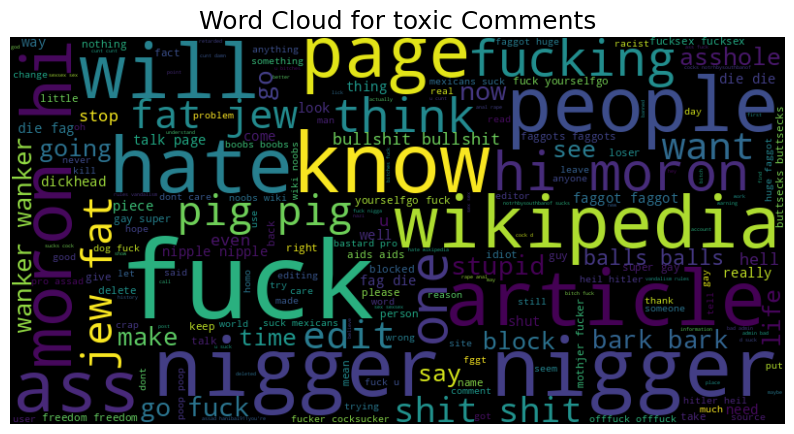

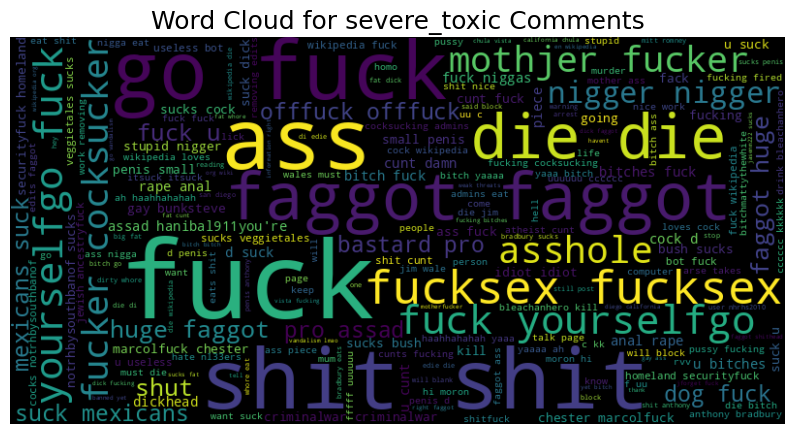

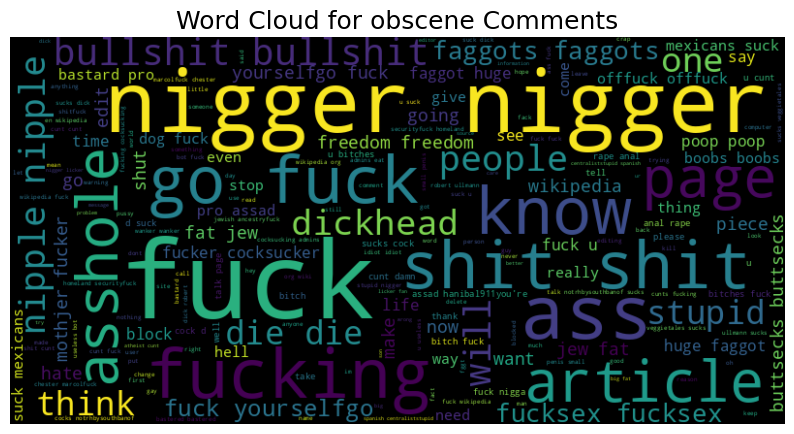

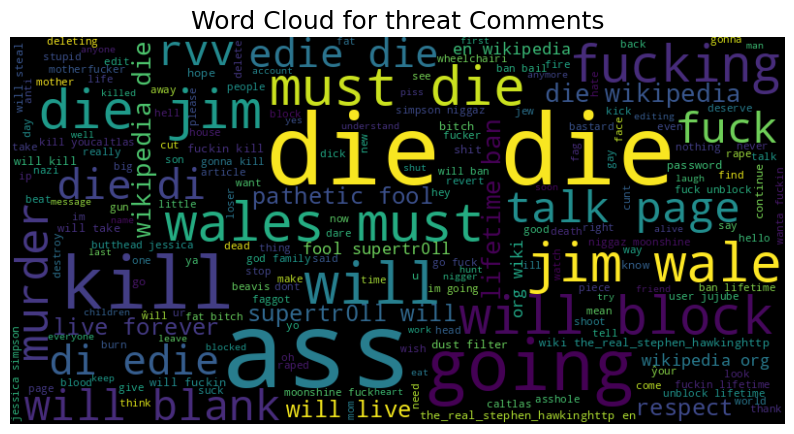

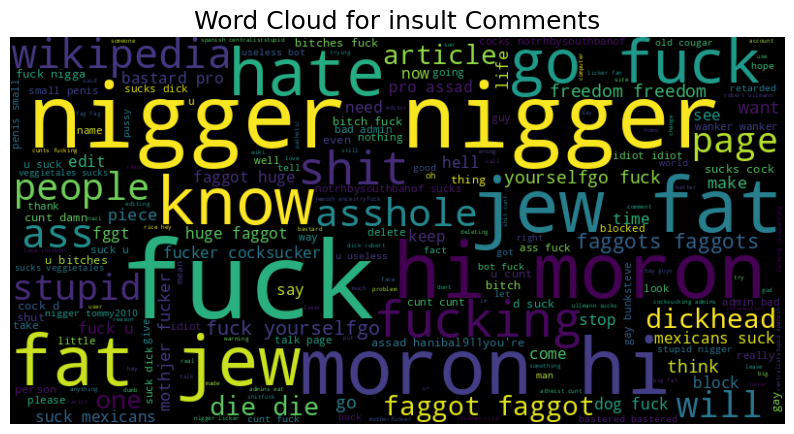

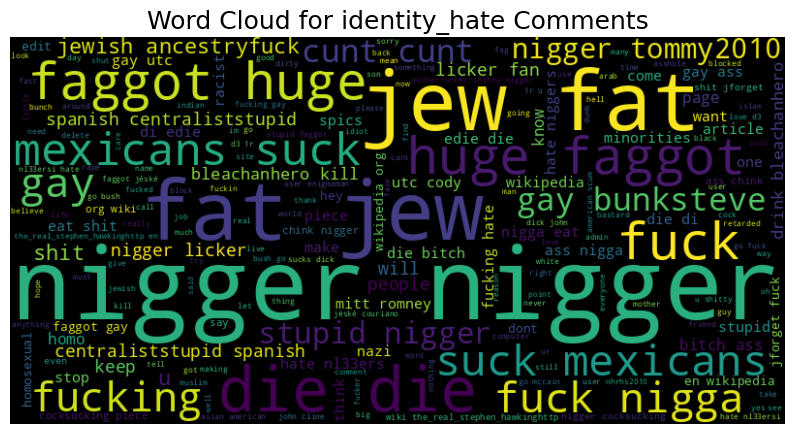

In [125]:
from wordcloud import WordCloud

def generate_wordcloud(label):
    text = ' '.join(data[data[label] == 1]['comment_text'])

    text = text.lower()
    text = text.replace('[^\w\s]', '')

    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Word Cloud for {label} Comments')
    plt.show()

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for label in labels:
    generate_wordcloud(label)

##Data Preparation: Handling Imbalance

In [127]:
ntd=len(non_toxic_data)/len(data)*100
print("% of non-toxic data: ", ntd)
print("% of toxic data: ", 100-ntd)

% of non-toxic data:  89.83211235124176
% of toxic data:  10.167887648758239


###Undersampling the Majority Class


In [128]:
from sklearn.utils import resample

non_toxic_downsampled = resample(non_toxic_data,
                                 replace=False,
                                 n_samples=len(toxic_data),
                                 random_state=42)

new_df = pd.concat([non_toxic_downsampled, toxic_data])

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)
new_df.shape

(32450, 10)

###Analyzing the Toxic Subcategories


In [129]:
non_toxic_data = new_df[(new_df['Bullying']!=1)]
toxic_data = new_df[(new_df['Bullying']==1)]
ntd=len(non_toxic_data)/len(new_df)*100
print("% of non-toxic data: ", ntd)
print("% of toxic data: ", 100-ntd)

% of non-toxic data:  50.0
% of toxic data:  50.0


In [130]:
print('Non Bullying: ',len(non_toxic_data))
print(new_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum())

Non Bullying:  16225
toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


In [131]:
toxic_labels=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for label in toxic_labels:
    print(label)
    toxic_class_data = new_df[
      (new_df[label] == 1) &
      (new_df[toxic_labels].drop(label, axis=1) == 0).all(axis=1)
    ]
    print("Unique label: ",len(toxic_class_data))
    cl_cmnts=new_df[(new_df[label]==1)]
    print(cl_cmnts[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum())
    print()

toxic
Unique label:  5666
toxic            15294
severe_toxic      1595
obscene           7926
threat             449
insult            7344
identity_hate     1302
dtype: int64

severe_toxic
Unique label:  0
toxic            1595
severe_toxic     1595
obscene          1517
threat            112
insult           1371
identity_hate     313
dtype: int64

obscene
Unique label:  317
toxic            7926
severe_toxic     1517
obscene          8449
threat            301
insult           6155
identity_hate    1032
dtype: int64

threat
Unique label:  22
toxic            449
severe_toxic     112
obscene          301
threat           478
insult           307
identity_hate     98
dtype: int64

insult
Unique label:  301
toxic            7344
severe_toxic     1371
obscene          6155
threat            307
insult           7877
identity_hate    1160
dtype: int64

identity_hate
Unique label:  54
toxic            1302
severe_toxic      313
obscene          1032
threat             98
insult          

###Oversampling for Rare Labels
To address underrepresentation of certain toxic labels, oversampling is applied where unique instances of a label are replicated to increase their representation.

In [132]:
max_class_size = 15000

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for label in labels:
    unique_class_data = new_df[
        (new_df[label] == 1) &
        (new_df[labels].drop(label, axis=1) == 0).all(axis=1)
    ]

    unique_count = len(unique_class_data)
    print(f"Unique label ({label}) count: {unique_count}")

    if unique_count == 0:
        print(f"No unique instances found for {label}. Skipping oversampling.")
        continue
    factor = new_df[label].sum()
    if factor < max_class_size:
        repetitions_needed = ((max_class_size-factor) // unique_count)
        oversampled_data = pd.concat([unique_class_data] * repetitions_needed, ignore_index=True)
        new_df = pd.concat([new_df, oversampled_data], ignore_index=True)
        print(f"Oversampled {label} to size: {len(oversampled_data)}")
    else:
        print(f"No oversampling needed for {label}, unique count is already sufficient.")

Unique label (toxic) count: 5666
No oversampling needed for toxic, unique count is already sufficient.
Unique label (severe_toxic) count: 0
No unique instances found for severe_toxic. Skipping oversampling.
Unique label (obscene) count: 317
Oversampled obscene to size: 6340
Unique label (threat) count: 22
Oversampled threat to size: 14520
Unique label (insult) count: 301
Oversampled insult to size: 6923
Unique label (identity_hate) count: 54
Oversampled identity_hate to size: 13554


In [133]:
print('Non Bullying: ',len(non_toxic_data))
print(new_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum())

Non Bullying:  16225
toxic            15294
severe_toxic      1595
obscene          14789
threat           14998
insult           14800
identity_hate    14959
dtype: int64


In [134]:
X = new_df['lemmatized_comment']
y = new_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'Bullying']]

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [136]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = {}
for col in y.columns:
    weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y[col])
    class_weights[col] = {0: weights[0], 1: weights[1]}

print("Class Weights for each category:", class_weights)

Class Weights for each category: {'toxic': {0: 0.63073359205375, 1: 2.4122858637374134}, 'severe_toxic': {0: 0.5110469304078015, 1: 23.130721003134795}, 'obscene': {0: 0.6253347571104105, 1: 2.4946581918993846}, 'threat': {0: 0.6275578764734899, 1: 2.4598946526203496}, 'insult': {0: 0.6254513706409887, 1: 2.492804054054054}, 'identity_hate': {0: 0.6271418372203712, 1: 2.4663079082826393}, 'Bullying': {0: 2.2738674884437597, 1: 0.6409349918348911}}


##Logistic Regression Model

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(
    estimator=LogisticRegression(max_iter=1000, class_weight='balanced')
)

model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                 max_iter=1000))

In [138]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
for i, label in enumerate(y.columns):
    print(f"Classification report for {label}:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))

Classification report for toxic:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     11724
           1       0.78      0.87      0.82      3034

    accuracy                           0.92     14758
   macro avg       0.87      0.91      0.89     14758
weighted avg       0.93      0.92      0.93     14758

Classification report for severe_toxic:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     14440
           1       0.28      0.81      0.42       318

    accuracy                           0.95     14758
   macro avg       0.64      0.88      0.70     14758
weighted avg       0.98      0.95      0.96     14758

Classification report for obscene:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     11742
           1       0.85      0.93      0.89      3016

    accuracy                           0.95     14758
   macro avg       0

Creating word cloud for Toxic:


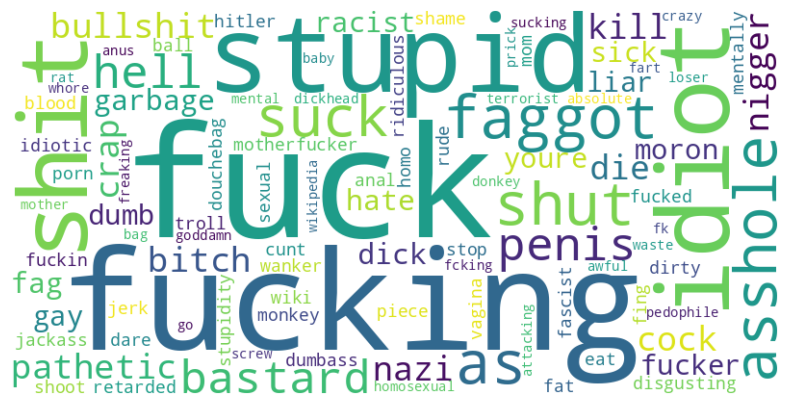

Creating word cloud for Severe Toxic:


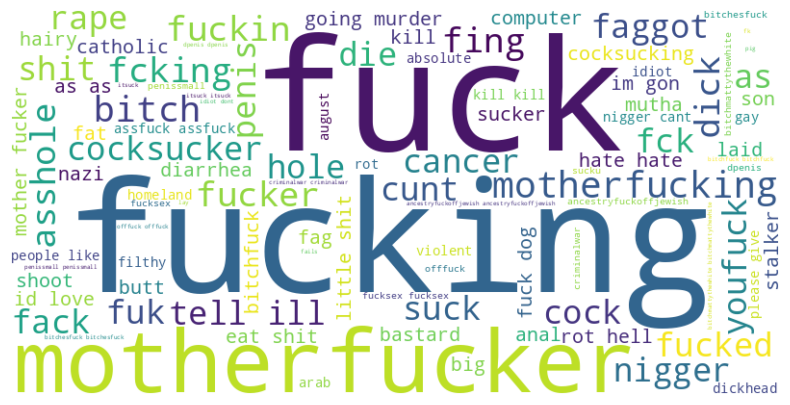

Creating word cloud for Obscene:


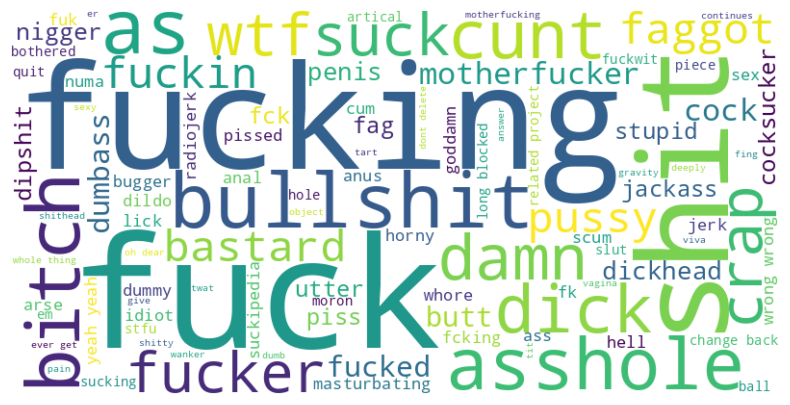

Creating word cloud for Threat:


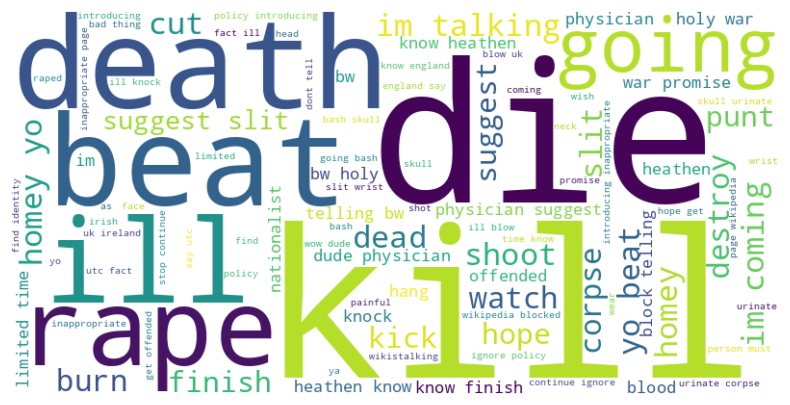

Creating word cloud for Insult:


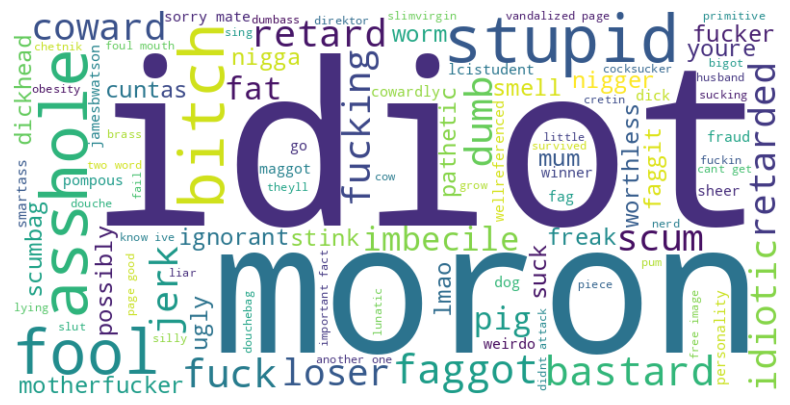

Creating word cloud for Identity Hate:


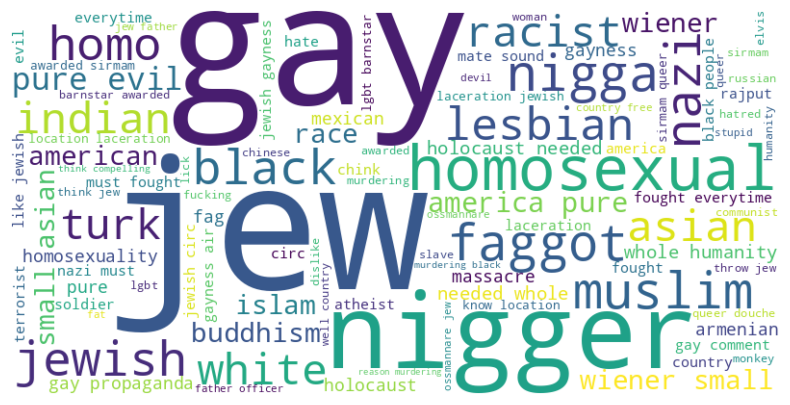

Creating word cloud for Bullying:


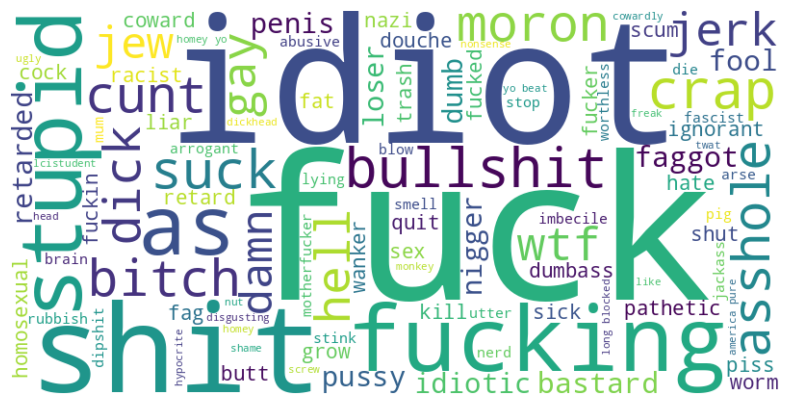

In [139]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plabel = ['Toxic', 'Severe Toxic', 'Obscene', 'Threat', 'Insult', 'Identity Hate', 'Bullying']
feature_names = vectorizer.get_feature_names_out()

def create_word_cloud(classifier, feature_names):
    class_coef = classifier.coef_[0]
    word_importance = {feature_names[idx]: class_coef[idx] for idx in np.argsort(class_coef)[::-1][:100]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_importance)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

for i, classifier in enumerate(model.estimators_):
    print(f"Creating word cloud for {plabel[i]}:")
    create_word_cloud(classifier, feature_names)

##RandomForestClassifier Model

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1
)

model_rf = OneVsRestClassifier(rf_model)

model_rf.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                     n_jobs=-1,
                                                     random_state=42))

In [145]:
y_pred = model_rf.predict(X_test)

for i, label in enumerate(y.columns):
    print(f"Classification report for {label}:")
    print(classification_report(y_test[label], y_pred[:, i]))

Classification report for toxic:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11724
           1       0.87      0.79      0.83      3034

    accuracy                           0.93     14758
   macro avg       0.91      0.88      0.89     14758
weighted avg       0.93      0.93      0.93     14758

Classification report for severe_toxic:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14440
           1       0.33      0.20      0.25       318

    accuracy                           0.97     14758
   macro avg       0.66      0.59      0.62     14758
weighted avg       0.97      0.97      0.97     14758

Classification report for obscene:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11742
           1       0.92      0.89      0.91      3016

    accuracy                           0.96     14758
   macro avg       0

##LinearSVC Model

In [146]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(class_weight="balanced", max_iter=1000)

model_svm = OneVsRestClassifier(svm_model)

model_svm.fit(X_train, y_train)

OneVsRestClassifier(estimator=LinearSVC(class_weight='balanced'))

In [147]:
y_pred_svm = model_svm.predict(X_test)

for i, label in enumerate(y.columns):
    print(f"Classification report for {label} (SVM):")
    print(classification_report(y_test[label], y_pred_svm[:, i]))

Classification report for toxic (SVM):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     11724
           1       0.81      0.87      0.84      3034

    accuracy                           0.93     14758
   macro avg       0.89      0.91      0.90     14758
weighted avg       0.93      0.93      0.93     14758

Classification report for severe_toxic (SVM):
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     14440
           1       0.29      0.67      0.40       318

    accuracy                           0.96     14758
   macro avg       0.64      0.82      0.69     14758
weighted avg       0.98      0.96      0.97     14758

Classification report for obscene (SVM):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     11742
           1       0.86      0.91      0.89      3016

    accuracy                           0.95     14758
  

##DecisionTreeClassifier Model

In [148]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight="balanced", max_depth=10, random_state=42)

model_dt = OneVsRestClassifier(dt_model)

model_dt.fit(X_train, y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=10,
                                                     random_state=42))

In [149]:
y_pred_dt = model_dt.predict(X_test)

for i, label in enumerate(y.columns):
    print(f"Classification report for {label} (Decision Tree):")
    print(classification_report(y_test[label], y_pred_dt[:, i]))

Classification report for toxic (Decision Tree):
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     11724
           1       0.76      0.46      0.58      3034

    accuracy                           0.86     14758
   macro avg       0.82      0.71      0.75     14758
weighted avg       0.85      0.86      0.85     14758

Classification report for severe_toxic (Decision Tree):
              precision    recall  f1-score   support

           0       0.99      0.94      0.97     14440
           1       0.22      0.78      0.34       318

    accuracy                           0.93     14758
   macro avg       0.61      0.86      0.65     14758
weighted avg       0.98      0.93      0.95     14758

Classification report for obscene (Decision Tree):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11742
           1       0.90      0.66      0.76      3016

    accuracy              

##XGBClassifier Model

In [151]:
from xgboost import XGBClassifier

scale_pos_weights = {}
for label in y.columns:
    num_neg = (y[label] == 0).sum()
    num_pos = (y[label] == 1).sum()
    scale_pos_weights[label] = num_neg / num_pos

classifiers = []

for label in y.columns:
    xgb = XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weights[label],
        random_state=42
    )
    classifiers.append(xgb)

model_xgb = OneVsRestClassifier(estimator=classifiers[0])
model_xgb.fit(X_train, y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

In [152]:
y_pred_xgb = model_xgb.predict(X_test)

for i, label in enumerate(y.columns):
    print(f"Classification report for {label} (XGBoost):")
    print(classification_report(y_test[label], y_pred_xgb[:, i]))

Classification report for toxic (XGBoost):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11724
           1       0.79      0.84      0.81      3034

    accuracy                           0.92     14758
   macro avg       0.87      0.89      0.88     14758
weighted avg       0.92      0.92      0.92     14758

Classification report for severe_toxic (XGBoost):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14440
           1       0.40      0.49      0.44       318

    accuracy                           0.97     14758
   macro avg       0.70      0.74      0.71     14758
weighted avg       0.98      0.97      0.97     14758

Classification report for obscene (XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11742
           1       0.89      0.92      0.91      3016

    accuracy                           0.96 

##KNeighborsClassifier Model

In [153]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')

model_knn = OneVsRestClassifier(knn_model)

model_knn.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(weights='distance'))

In [154]:
y_pred_knn = model_knn.predict(X_test)

for i, label in enumerate(y.columns):
    print(f"Classification report for {label} (KNN):")
    print(classification_report(y_test[label], y_pred_knn[:, i]))

Classification report for toxic (KNN):
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     11724
           1       0.72      0.42      0.53      3034

    accuracy                           0.85     14758
   macro avg       0.79      0.69      0.72     14758
weighted avg       0.83      0.85      0.83     14758

Classification report for severe_toxic (KNN):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14440
           1       0.50      0.14      0.22       318

    accuracy                           0.98     14758
   macro avg       0.74      0.57      0.60     14758
weighted avg       0.97      0.98      0.97     14758

Classification report for obscene (KNN):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11742
           1       0.87      0.65      0.74      3016

    accuracy                           0.91     14758
  